In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import backtrader as bt
import numpy as np

In [29]:
data=pd.read_csv('Technology_Firm_Stock_Price.csv')

In [30]:
data.head(10)

,Date,ADSK,ORCL,PTC,CDNS,FICO,CRM,SNPS,INTU,TYL,...,NOW,MSFT,PANW,CDW,NTAP,STX,HPQ,WDC,AAPL,HPE
0,2020-01-02,187.830002,50.359100,76.370003,71.440002,382.920013,166.990005,142.869995,258.836151,306.239990,...,291.239990,154.779541,78.470001,137.363739,55.579060,51.156185,18.257439,64.771545,73.152641,14.081444
1,2020-01-03,184.949997,50.181740,75.430000,70.419998,381.920013,166.169998,141.759995,257.105133,306.670013,...,291.100006,152.852264,78.943336,135.712097,54.631645,49.811756,18.029110,63.774597,72.441467,13.733110
2,2020-01-06,187.119995,50.443100,76.269997,70.849998,384.000000,173.449997,141.979996,259.079346,310.209991,...,292.869995,153.247345,80.086670,134.690536,54.498821,49.219864,18.099367,62.550629,73.018684,13.689568
3,2020-01-07,187.500000,50.555126,75.919998,71.070000,388.489990,176.000000,142.960007,259.137634,311.269989,...,292.910004,151.850082,80.546669,134.537781,54.853001,49.811756,18.143276,66.785164,72.675278,13.619902
4,2020-01-08,189.949997,50.752010,76.980003,72.279999,391.329987,177.330002,145.860001,265.371277,310.989990,...,295.649994,154.268814,79.523331,134.337265,55.906673,50.200710,18.380386,67.752487,73.844353,13.724401
5,2020-01-09,191.940002,50.986420,77.330002,73.360001,401.510010,179.600006,148.669998,267.855896,311.390015,...,299.309998,156.196075,80.023331,135.540222,56.190014,51.122356,18.652618,67.732750,75.412880,13.646026
6,2020-01-10,192.360001,51.052048,76.750000,73.029999,404.010010,180.199997,148.460007,268.196960,310.230011,...,298.880005,155.473328,79.290001,135.912552,55.897820,50.716492,18.775564,67.061546,75.583351,13.471859
7,2020-01-13,192.449997,51.173931,77.220001,73.389999,408.920013,183.850006,149.929993,268.966675,309.619995,...,303.850006,157.342804,80.306664,136.857727,56.765545,51.570522,18.845819,68.236153,77.198143,13.541526
8,2020-01-14,191.110001,51.455215,77.970001,72.610001,402.769989,182.119995,148.190002,265.692780,308.570007,...,301.500000,156.234634,80.000000,137.440094,56.473347,51.392941,18.793129,68.315117,76.155701,13.532816
9,2020-01-15,190.789993,51.342693,79.169998,71.940002,403.869995,181.059998,147.910004,266.004608,311.309998,...,304.869995,157.246429,80.233330,138.051132,56.836391,51.164642,18.810694,65.807961,75.829346,13.489275


In [31]:
data.shape

(1006, 65)

In [32]:
data['Date'] = pd.to_datetime(data['Date'])

In [33]:
data['Spread'] = data['SWKS'] - data['QRVO']

window = 10

data['Spread_MA'] = data['Spread'].rolling(window=window).mean()

data['Signal'] = 0 #do nothing

data['Signal'][data['Spread'] > data['Spread_MA']] = 1  #buy
data['Signal'][data['Spread'] < data['Spread_MA']] = -1  #sell

data['Daily_Return'] = data['Spread'].shift(-1) * data['Signal']

data['Cumulative_Return'] = data['Daily_Return'].cumsum()


/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_24802/405143374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Spread'] > data['Spread_MA']] = 1  #buy
/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_24802/405143374.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Spread'] < data['Spread_MA']] = -1  #sell


In [34]:
data[['Spread','Spread_MA','Signal','Daily_Return','Cumulative_Return']]

,Spread,Spread_MA,Signal,Daily_Return,Cumulative_Return
0,-3.040421,NaN,0,-0.000000,-0.000000
1,-2.223183,NaN,0,-0.000000,-0.000000
2,-3.462891,NaN,0,-0.000000,-0.000000
3,-2.022736,NaN,0,-0.000000,-0.000000
4,-1.977219,NaN,0,-0.000000,-0.000000
...,...,...,...,...,...
1001,0.239998,0.459999,-1,-0.130005,1425.836029
1002,0.130005,0.407999,-1,0.199997,1426.036026
1003,-0.199997,0.348000,-1,0.260002,1426.296028
1004,-0.260002,0.256999,-1,0.190002,1426.486031


In [35]:
data=data[:-1]

In [36]:
total_profit = data['Cumulative_Return'].iloc[-1]

print("Total Profit at the end of three years:", total_profit)

Total Profit at the end of three years: 1426.486030578613


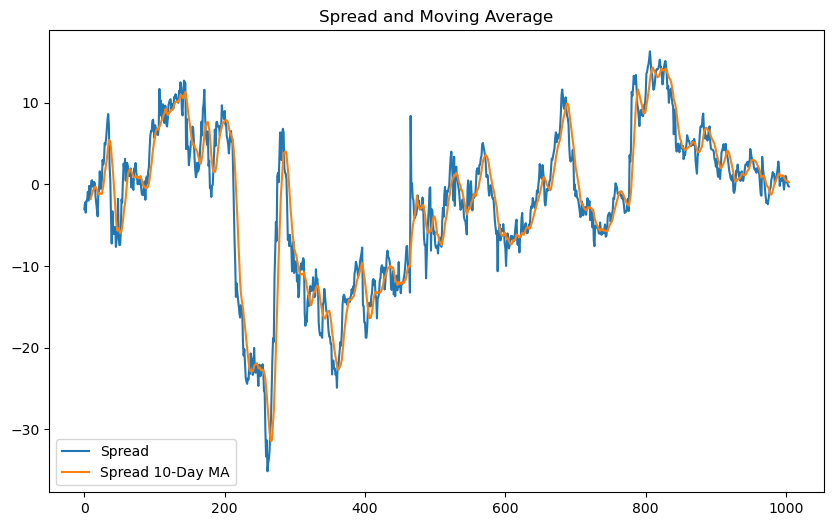

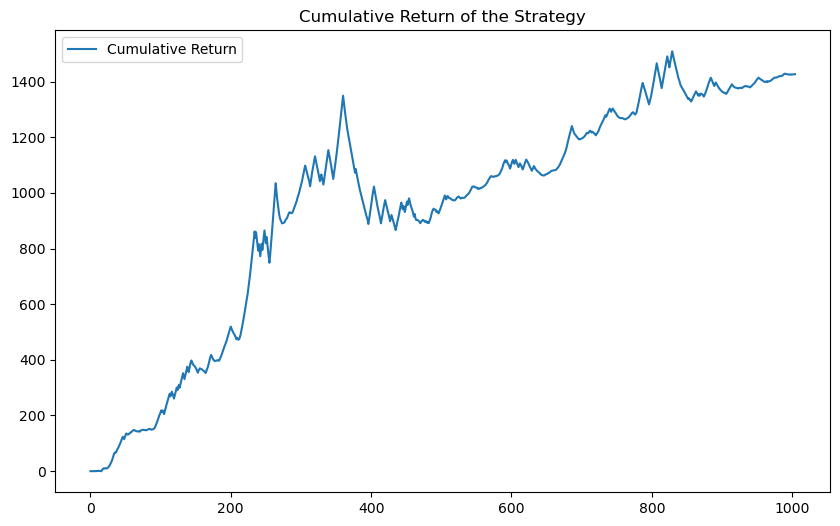

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(data['Spread'], label='Spread')
plt.plot(data['Spread_MA'], label=f'Spread {window}-Day MA')
plt.legend()
plt.title('Spread and Moving Average')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative_Return'], label='Cumulative Return')
plt.legend()
plt.title('Cumulative Return of the Strategy')
plt.show()

In [82]:
class PairsTradingStrategy(bt.Strategy):
    params = (
        ("initial_budget", 100000),
    )

    def __init__(self):
        self.stock1=self.data0
        self.stock2=self.data1
        self.inPosition=0
        self.signals = self.data0.signal
        self.current_signal_index = 0

    def next(self):
        signal=self.signals.iloc[self.current_signal_index]
        #print(signal)
        if self.inPosition == 1:
            if signal.iloc[0] == -1:
                self.close()  # Close the long position
                self.sell(data=self.stock2)
                self.buy(data=self.stock1)
                self.inPosition = 0
            elif signal.iloc[0] == 1 or signal.iloc[0]==0:
                self.inPosition=1
            
        elif self.inPosition == 0:
            if signal.iloc[0] == -1:
                self.buy(data=self.stock2)
                self.sell(data=self.stock1)
                self.inPosition = -1
            elif signal.iloc[0] == 1:
                self.sell(data=self.stock2)
                self.buy(data=self.stock1)
                self.inPosition = 1
            elif signal.iloc[0]==0:
                self.inPosition=0

        elif self.inPosition == -1:
            if signal.iloc[0] == 1:
                self.close()  # Close the short position
                self.buy(data=self.stock2)
                self.sell(data=self.stock1)
                self.inPosition = 0
            if signal.iloc[0] == -1 or signal.iloc[0]==0:
                self.inPosition=-1

        self.current_signal_index += 1

def run_backtest(stock1_data, stock2_data, signals, initial_budget):
    cerebro = bt.Cerebro()

    # Add data feeds
    data1 = bt.feeds.PandasData(dataname=stock1_data, name="Stock1")
    data2 = bt.feeds.PandasData(dataname=stock2_data, name="Stock2")
    
    # Add signal column
    data1.signal = signals

    cerebro.adddata(data1)
    cerebro.adddata(data2)

    cerebro.addstrategy(PairsTradingStrategy, initial_budget=initial_budget)

    cerebro.run()

    end_budget = cerebro.broker.getvalue()
    
    return end_budget

if __name__ == "__main__":
    
    stock1_data = data[['Date', 'SWKS']].set_index("Date")
    stock2_data = data[['Date', 'QRVO']].set_index("Date")
    signals = data[['Date', 'Signal']].set_index("Date")

    initial_budget = 100000  # Set your initial budget here

    end_budget=run_backtest(stock1_data, stock2_data, signals, initial_budget)

    print(end_budget)


nan


In [69]:
data_1 =data[['Date', 'SWKS']].set_index("Date")
data_1.iloc[0]

SWKS    112.919579
Name: 2020-01-02 00:00:00, dtype: float64